In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from scipy.stats import shapiro

In [11]:
data = pd.read_excel("../Data/Consolidado2022/Junio_JUNAEB.xlsx", sheet_name=1)

In [12]:
data.head()

,Servicio,Precio por racion,Dias,Raciones diarias,Racion*$*Dias,Racion*Dias,$Racion/dia,Unnamed: 7
0,T,947.30,1,60,56838.0,60,1134.894953,567.447476
1,D,1023.46,1,60,61407.6,60,NaN,NaN
2,A,1335.20,1,60,80112.0,60,NaN,NaN
3,D,889.66,20,134,2384288.8,2680,NaN,NaN
4,A,1683.80,20,134,4512584.0,2680,NaN,NaN


In [21]:
data.rename(columns={'Precio por racion': 'precio_racion', 'Raciones diarias': 'Total'}, inplace=True)

In [22]:
data.head()

,Servicio,precio_racion,Dias,raciones_diarias,Racion*$*Dias,Racion*Dias,$Racion/dia,Unnamed: 7
0,T,947.30,1,60,56838.0,60,1134.894953,567.447476
1,D,1023.46,1,60,61407.6,60,NaN,NaN
2,A,1335.20,1,60,80112.0,60,NaN,NaN
3,D,889.66,20,134,2384288.8,2680,NaN,NaN
4,A,1683.80,20,134,4512584.0,2680,NaN,NaN


In [17]:
data.head()

,Servicio,Precio por racion,Dias,Raciones diarias,Racion*$*Dias,Racion*Dias,$Racion/dia,Unnamed: 7
0,T,947.30,1,60,56838.0,60,1134.894953,567.447476
1,D,1023.46,1,60,61407.6,60,NaN,NaN
2,A,1335.20,1,60,80112.0,60,NaN,NaN
3,D,889.66,20,134,2384288.8,2680,NaN,NaN
4,A,1683.80,20,134,4512584.0,2680,NaN,NaN


In [24]:
filas_pre = len(data['raciones_diarias'])

data = data[data['precio_racion'] < 10000]
data = data[data['precio_racion'] > 0]
data = data[data['raciones_diarias'] > 0]

filas_post = len(data['raciones_diarias'])

print(f'''
Pre: {filas_pre}
Post: {filas_post} 
''')


Pre: 61278
Post: 61278 



Text(0.5, 1.0, 'Promedio anual de consolidado2020')

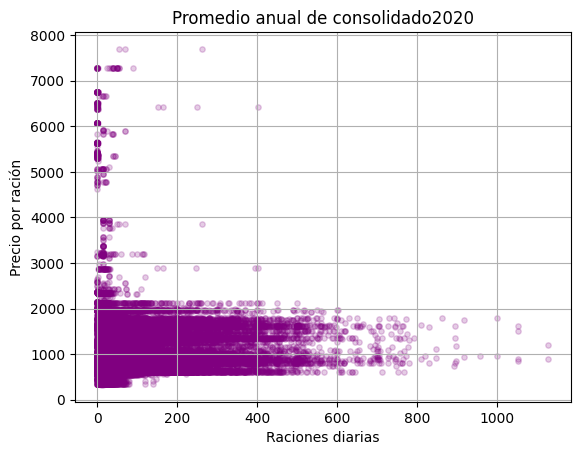

In [25]:
plt.scatter(data['raciones_diarias'], data['precio_racion'], color='purple', s=15, alpha=0.2)
plt.xlabel('Raciones diarias')
plt.ylabel('Precio por ración')
plt.grid(True)
plt.title('Promedio anual de consolidado2020')


In [37]:
model = LinearRegression()
tot = data['raciones_diarias'].values.reshape(-1, 1)
PR = data['precio_racion'].values.reshape(-1, 1)
model.fit(X=tot, y=PR);


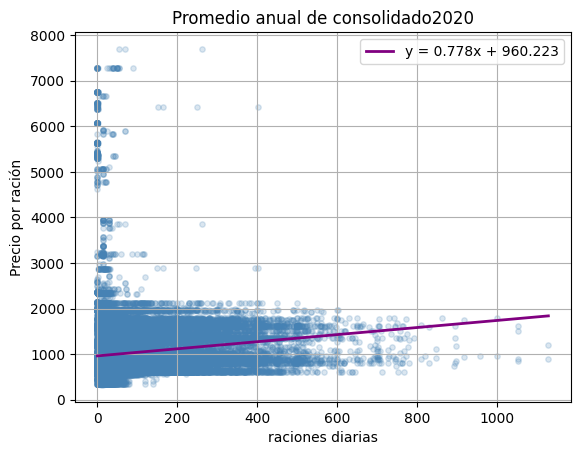

In [39]:
m = model.coef_[0][0]
b = model.intercept_[0]

x = np.linspace(min(data['raciones_diarias']) + 0.001, max(data['raciones_diarias']), 100)
y = m * x + b

plt.scatter(data['raciones_diarias'], data['precio_racion'], color='steelblue', s=15, alpha=0.2)
plt.plot(x, y, label=f'y = {round(m,3)}x + {round(b,3)}', color='Purple', linewidth=2.0)
plt.xlabel('raciones diarias')
plt.ylabel('Precio por ración')
plt.grid(True)
plt.title('Promedio anual de consolidado2020')
plt.legend()

In [31]:
model = smf.ols('precio_racion ~ raciones_diarias', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_racion   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1226.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          5.28e-266
Time:                        20:34:39   Log-Likelihood:            -4.7183e+05
No. Observations:               61278   AIC:                         9.437e+05
Df Residuals:                   61276   BIC:                         9.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          960.2231      2.500  

In [ ]:
# Test de homocedasticidad

names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result = sms.het_breuschpagan(model.resid, model.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 90.3312017599747),
 ('p-value', 2.0145054587318526e-21),
 ('f-value', 91.26995170391763),
 ('f p-value', 1.6031772284167018e-21)]